# Understanding the Dataset

In [2]:
import pandas as pd

# load dataset
file_path = '/Users/bandito2/Documents/FA24/usdjourney/archive/climate-fever.csv'
data = pd.read_csv(file_path)

# displays the first few rows of the dataset to understand structure
data[['claim', 'evidences/0/evidence']].head()


,claim,evidences/0/evidence
0,Global warming is driving polar bears toward e...,"""Recent Research Shows Human Activity Driving ..."
1,The sun has gone into ‘lockdown’ which could c...,The current consensus of the scientific commun...
2,The polar bear population has been growing.,"""Ask the experts: Are polar bear populations i..."
3,Ironic' study finds more CO2 has slightly cool...,CO2 in the mesosphere acts as a cooling agent ...
4,Human additions of CO2 are in the margin of er...,While CO 2 absorption and release is always ha...


The Climate Fever dataset contains claims and evidence texts on climate change, which will be analyzed using NER (Named Entity Recognition) and POS (Part of Speech) Tagging techniques. Each row in the dataset includes a 'claim', which represents a statement related to climate change, and 'evidence/0/evidence, which contains supporting or refuting evidence. The objective is to extract named entities - such as people, locations, and organizations - from these texts and assign grammatical roles (POS tags) to different words. 

By focusing on these columns, the aim will be to analyze how climate-related claims are framed and supported with evidence, identifying key entities and sentence structure in the text. This type of analysis will help understand the relationships betweeen different components in climate change discourse, such as identifying which organizations are mentioned in connection with climate policies. spaCy will serve as the primary vehicle for NLP to implement NER and POS tagging, as mentioned in the documentation on named entities (spaCy.io, n.d.).

# Preprocessing the Text data

In [33]:
import spacy

# load spaCy's English language model
nlp = spacy.load("en_core_web_lg")

# clean the text with preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # normalize with to_lowercase
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]  # lemmatize and remove stopwords
    return " ".join(tokens)

# apply preprocessing to the claim and evidence columns
data['clean_claim'] = data['claim'].apply(preprocess_text)
data['clean_evidence'] = data['evidences/0/evidence'].apply(preprocess_text)

# display preprocessed text
data[['claim', 'clean_claim', 'clean_evidence']].head()


,claim,clean_claim,clean_evidence
0,Global warming is driving polar bears toward e...,global warming drive polar bear extinction,recent research show human activity drive eart...
1,The sun has gone into ‘lockdown’ which could c...,sun go lockdown cause freezing weather earthqu...,current consensus scientific community aerosol...
2,The polar bear population has been growing.,polar bear population grow,ask expert polar bear population increase
3,Ironic' study finds more CO2 has slightly cool...,ironic study find slightly cool planet,mesosphere act cool agent efficiently radiate ...
4,Human additions of CO2 are in the margin of er...,human addition margin error current measuremen...,co absorption release happen result natural pr...


Preprocessing text is necessary in Natural Language Processing (NLP) to make the data clean and suitable for further analysis. This involves removing punctuation, converting all text to lowercase, and eliminating stop words—common words that don't contribute much meaning, such as "the," "is," and "and." Tokenization breaks the text into individual words (tokens), and lemmatization converts words into their base form (e.g., "running" to "run").

For example, the sentence "The polar bears are rapidly migrating" would be preprocessed into "polar bear rapid migrate," stripping out unnecessary words and standardizing the forms of key words. This ensures that the Named Entity Recognition (NER) and Part-of-Speech (POS) tagging models focus on the important words and patterns in the dataset, improving both the accuracy and relevance of the analysis.

In this step, we will apply these techniques using spaCy, which is known for its efficient text preprocessing pipeline. This aligns with methods described in the Understanding Named Entity Recognition article, where similar preprocessing steps are applied before entity recognition.

# Applying Named entity Recognition (NER)

Now that the text is preprocessed, Named Entity Recognition (NER) will be applied to extract specific entities such as people, organizations, locations, and more. NER identifies and classifies words or phrases in the text that represent these entities. For example, in a sentence like "Global warming is affecting polar bears in the Arctic," NER would recognize "polar bears" as a person/animal entity and "Arctic" as a location.

This step is necessary for analyzing text as it helps to structure unstructured text data by identifying key elements. Named Entity Recognition has applications in areas like information extraction, question answering, and summarization. In the context of the Climate Fever dataset, NER can help us determine which organizations or locations are being frequently mentioned in climate-related claims and evidence. This builds on the concepts described in the spaCy documentation on NER, which highlights how spaCy can recognize common entities using its pre-trained models (spaCy, n.d.).

In [44]:
# extract named entities from text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# NER to the preprocessed claim and evidence columns
data['claim_entities'] = data['clean_claim'].apply(extract_entities)
data['evidence_entities'] = data['clean_evidence'].apply(extract_entities)

# display first and last 10 of the extracted named entities
data[['claim', 'claim_entities', 'evidence_entities']].head(-10)


,claim,claim_entities,evidence_entities
0,Global warming is driving polar bears toward e...,[],[]
1,The sun has gone into ‘lockdown’ which could c...,[],[]
2,The polar bear population has been growing.,[],[]
3,Ironic' study finds more CO2 has slightly cool...,[],[]
4,Human additions of CO2 are in the margin of er...,[],[]
...,...,...,...
1520,Global warming theory holds that one of the fi...,"[(James Taylor, PERSON)]",[]
1521,In those days you couldn’t have seen across th...,"[(those days, DATE)]",[]
1522,Ljungqvist's millennial temperature reconstruc...,"[(Ljungqvist, PERSON), (Moberg, PERSON)]","[(Ljungqvist, PERSON), (Northern Hemisphere, L..."
1523,It also concludes that current northern hemisp...,[],"[(the Northern Hemisphere, LOC), (the Southern..."


spaCy’s pre-trained model was used to identify and extract entities from both the claim and evidence text. For each sentence, the function extract_entities goes through the text, identifies named entities (such as people, locations, and organizations), and then returns them along with their label(s).

The empty brackets in the output indicate that the Named Entity Recognition (NER) process did not identify all named entities in the claims or evidence. This could be due to lack of recognizable entities, specialized vocabulary, or text preprocessing.

We can identify important entities that are repeatedly mentioned in discussions on climate change. This is useful for extracting key players, such as environmental organizations, governments, or locations affected by climate change.

# Applying Part of Speech (POS) Tagging

Now that named entitites have been identified, Part-of-Speech (POS) tagging can be performed. POS tagging assigns grammatical labels to each word in a sentence, such as noun, verb, adjective, etc. Understanding the roles words play in a sentence helps us interpret the structure and meaning of the text. For example, in the sentence "The polar bears are migrating," POS tagging identifies "polar" as an adjective and "bears" as a noun.

In the Climate Fever dataset, POS tagging can reveal how claims are constructed and what parts of speech (such as verbs or adjectives) are frequently used. This is helps to analyze sentence structure in scientific claims and understand the tone or focus of the evidence. By tagging each word, we get insights into the overall composition of the text, aiding in deeper linguistic analysis (Pykes 2020). 

In [13]:
# POS tagging to text
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# POS tagging to the preprocessed claim and evidence columns
data['claim_pos_tags'] = data['clean_claim'].apply(pos_tagging)
data['evidence_pos_tags'] = data['clean_evidence'].apply(pos_tagging)

# display POS tags
data[['claim', 'claim_pos_tags', 'evidence_pos_tags']].head()


,claim,claim_pos_tags,evidence_pos_tags
0,Global warming is driving polar bears toward e...,"[(Global, ADJ), (warming, NOUN), (is, AUX), (d...","[(Recent, ADJ), (Research, NOUN), (Shows, VERB..."
1,The sun has gone into ‘lockdown’ which could c...,"[(The, DET), (sun, NOUN), (has, AUX), (gone, V...","[(The, DET), (current, ADJ), (consensus, NOUN)..."
2,The polar bear population has been growing.,"[(The, DET), (polar, ADJ), (bear, NOUN), (popu...","[(Ask, VERB), (the, DET), (experts, NOUN), (Ar..."
3,Ironic' study finds more CO2 has slightly cool...,"[(Ironic, ADJ), (study, NOUN), (finds, VERB), ...","[(in, ADP), (the, DET), (mesosphere, NOUN), (a..."
4,Human additions of CO2 are in the margin of er...,"[(Human, ADJ), (additions, NOUN), (of, ADP), (...","[(While, SCONJ), (CO, NOUN), (absorption, NOUN..."


spaCy’s nlp model was used to tag each word in the claim and evidence columns with its respective part of speech. The function pos_tagging goes through the preprocessed text and assigns a POS tag to each word, such as:

- Noun (NOUN)
- Verb (VERB)
- Adjective (ADJ)
- Preposition (ADP)

For instance, in a sentence like "Global warming is increasing," the POS tags would identify "global" as an adjective (ADJ), "warming" as a noun (NOUN), and "increasing" as a verb (VERB). This information helps for understanding the sentence's structure.

By applying POS tagging, we can gain insight into the language and sentence construction used in climate-related claims and evidence. For example, scientific claims may heavily rely on verbs like "prove," "support," or "refute," which could provide information about how evidence is being presented.

# Analyzing and Visualizing the Results 

Now that we have extracted named entities using NER and tagged parts of speech using POS tagging, we can proceed to analyze and visualize the results. Visualization helps us better understand the distribution of named entities and POS tags across the dataset, revealing patterns in the language used in climate-related claims and evidence.

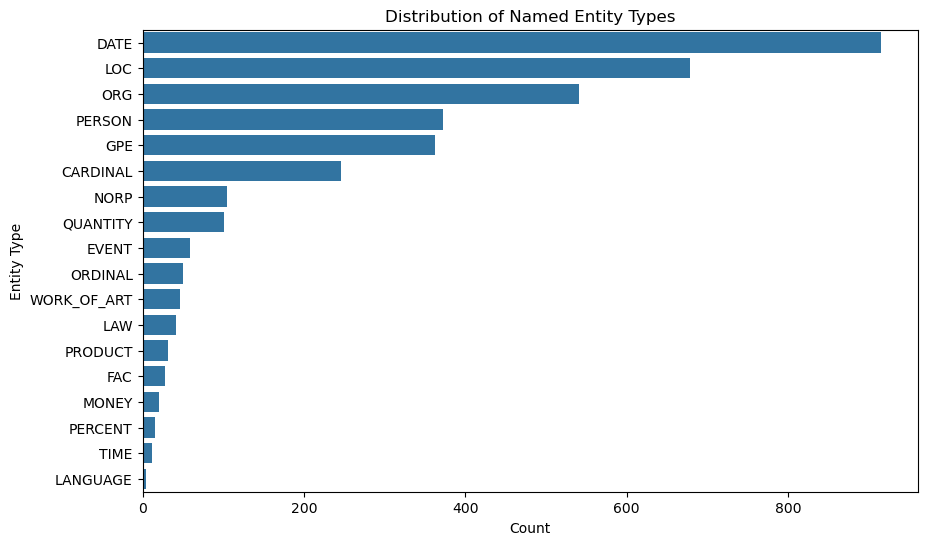

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# extract entity labels from both claim and evidence
entity_labels = [entity[1] for sublist in data['claim_entities'] for entity in sublist] + \
                [entity[1] for sublist in data['evidence_entities'] for entity in sublist]

# plot the distribution of named entity types
plt.figure(figsize=(10, 6))
sns.countplot(y=entity_labels, order=pd.Series(entity_labels).value_counts().index)
plt.title('Distribution of Named Entity Types')
plt.xlabel('Count')
plt.ylabel('Entity Type')
plt.show()


We extract all the entity labels (such as PERSON, ORG, GPE) from both the claims and evidence columns and then visualize their distribution using a bar chart. This plot helps us understand which types of entities are most frequently discussed in climate-related claims and evidence. For example, we may find that organizations (ORG) or locations (GPE) are mentioned more frequently, indicating a focus on institutions or specific geographic regions.

## POS Tagging Analysesb

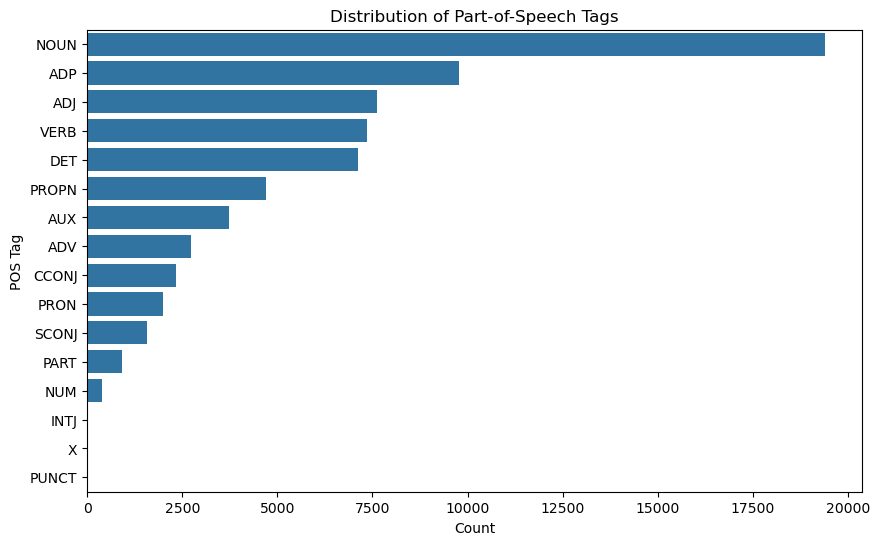

In [20]:
# extract POS tags from both claim and evidence
pos_tags = [tag[1] for sublist in data['claim_pos_tags'] for tag in sublist] + \
           [tag[1] for sublist in data['evidence_pos_tags'] for tag in sublist]

# plot the distribution of POS tags
plt.figure(figsize=(10, 6))
sns.countplot(y=pos_tags, order=pd.Series(pos_tags).value_counts().index)
plt.title('Distribution of Part-of-Speech Tags')
plt.xlabel('Count')
plt.ylabel('POS Tag')
plt.show()


This collects the POS tags (such as NOUN, VERB, ADJ) from both claims and evidence and visualizes their distribution. The resulting bar chart shows which parts of speech are most commonly used. For example, a higher frequency of verbs (VERB) might indicate that claims are action-oriented, focusing on what is happening or being done in relation to climate change.

## Analyses and Insights

By analyzing the distribution of named entities, one might find that certain types of entities, such as organizations (ORG) or locations (GPE), dominate the conversation around climate change. This suggests that much of the discussion may center around institutional actions or geographical impacts. For example, organizations like "NASA" or locations like "Arctic" may be frequently mentioned, reflecting the focus of climate debates.

POS tagging reveals the grammatical structure of climate-related claims. For instance, a high occurrence of verbs (VERB) could indicate that many claims and evidence statements are action-based, focusing on what is being done or observed (e.g., "temperatures are rising"). A higher frequency of adjectives (ADJ) might reflect the descriptive nature of the claims (e.g., "severe global warming"). This helps understand how the language is framed in both claims and supporting evidence.

# Challenges 

One of the key challenges in the NER process was entity ambiguity. For example, the term "Amazon" could refer to both the corporation and the rainforest, depending on the context. This challenge required careful interpretation and sometimes led to misclassification of entities. As described in the article on Understanding Named Entity Recognition, such ambiguity is common in NER tasks, especially when dealing with domain-specific texts like climate change.

Another challenge arose with POS tagging, especially in long and complex sentences where multiple grammatical structures were present. In some cases, words like “increase” could serve as both a noun and a verb, depending on their context within the sentence. This required extra care in interpreting the results and ensuring accuracy.

The presence of domain-specific terms related to climate science, such as “carbon sequestration” or “emission trading,” added complexity to the analysis. While spaCy’s pre-trained models handle general language quite well, specialized models trained on climate science texts might have improved the accuracy of both NER and POS tagging.

# Conclusion

The analysis of the Climate Fever dataset using NER and POS tagging techniques provided valuable insights into the language of climate change discourse. Named entities revealed the key players and locations frequently discussed, while POS tagging highlighted the action-oriented nature of the claims and evidence. Despite some challenges with entity ambiguity and domain-specific terminology, the overall approach successfully structured the unstructured text, allowing for better interpretation of climate-related information.

In future work, integrating more advanced models, like domain-adapted versions of BERT (e.g., SciBERT or ClimateBERT), could enhance both NER and POS tagging accuracy in climate-related texts. Also, training the model on a larger dataset that includes more diverse climate-related articles or scientific papers could also improve entity recognition and reduce ambiguities.

# References

D212digital. (2023, February 13). Understanding named entity recognition: What is it and how to use it in natural language processing?. Medium. https://medium.com/@212digital/understanding-named-entity-recognition-what-is-it-and-how-to-use-it-in-natural-language-processing-b81e77e1d155 

Linguistic features · spacy usage documentation. spacy.io. (n.d.). https://spacy.io/usage/linguistic-features#named-entities  

Named Entity Recognition (NER) Explained in NLP (YouTube Video)
YouTube. (n.d.). YouTube. https://www.youtube.com/watch?v=MACmU9MxGqE 

Pykes, K. (2020, November 25). Part of speech tagging for beginners. Medium. https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba 